# importing libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States

Assualt- Assualt rate in different places of United States

UrbanPop - urban population in different places of United States

Rape - Rape rate in different places of United States


# Reading the data

In [2]:
crime=pd.read_csv(r"C:\Users\ABC\Downloads\crime_data.csv")

In [3]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
crime['Unnamed: 0'].value_counts()

Alabama           1
Pennsylvania      1
Nevada            1
New Hampshire     1
New Jersey        1
New Mexico        1
New York          1
North Carolina    1
North Dakota      1
Ohio              1
Oklahoma          1
Oregon            1
Rhode Island      1
Alaska            1
South Carolina    1
South Dakota      1
Tennessee         1
Texas             1
Utah              1
Vermont           1
Virginia          1
Washington        1
West Virginia     1
Wisconsin         1
Nebraska          1
Montana           1
Missouri          1
Mississippi       1
Arizona           1
Arkansas          1
California        1
Colorado          1
Connecticut       1
Delaware          1
Florida           1
Georgia           1
Hawaii            1
Idaho             1
Illinois          1
Indiana           1
Iowa              1
Kansas            1
Kentucky          1
Louisiana         1
Maine             1
Maryland          1
Massachusetts     1
Michigan          1
Minnesota         1
Wyoming           1


# EDA

In [5]:
crime.drop('Unnamed: 0',inplace=True,axis=1)

In [6]:
crime.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [7]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


from above , there are no any missing values in dataset

In [8]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


from above table we say that there low chances of outliars in the data set 

In [9]:
map= crime.corr()
map

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


<AxesSubplot:>

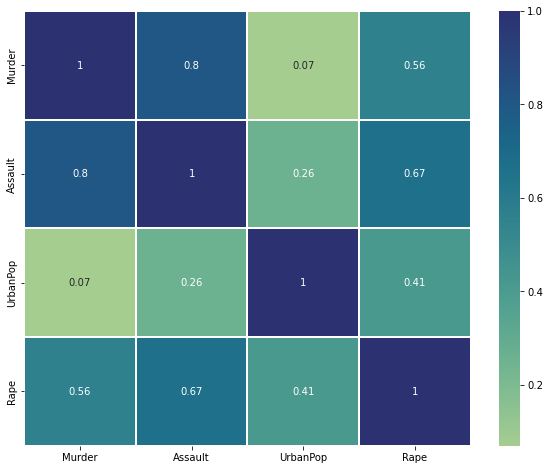

In [10]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(data=map,annot= True, linewidths = 2, cmap = 'crest')

from above plot assault and murder are correlated upto 80% 
assault and rape  are correlated upto 67%
rape and murder are correlated upto 56 %                 

cheking with histograms 

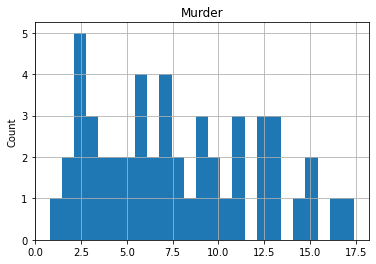

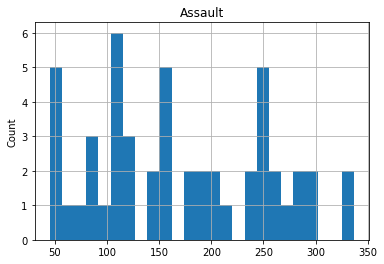

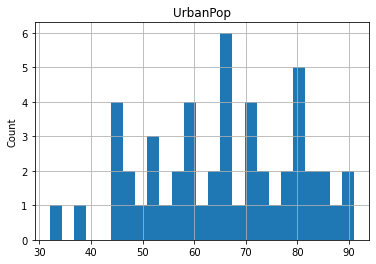

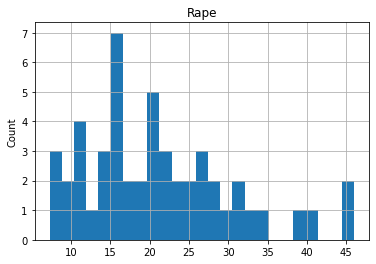

In [11]:
for feature in crime.columns:
    data=crime
    data[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

from above plots we can say that in crime - no. of murders in differant states are upto 17 are amoung less with others 

followed by rape having less number of count which is 45 

UrbanPop having number count upto 90  in in differant states 

most happen crime in United States is assult which is having range from 50 to 350 count
 

# distributions 

Murder


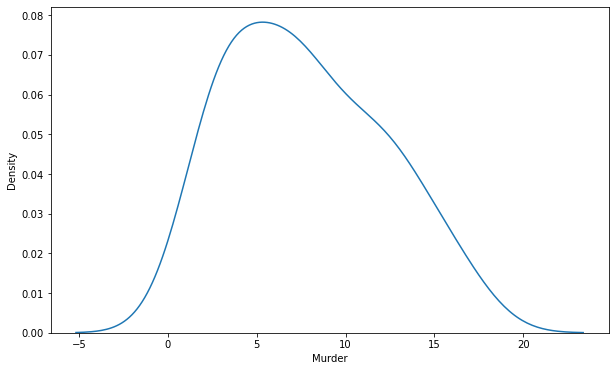

Assault


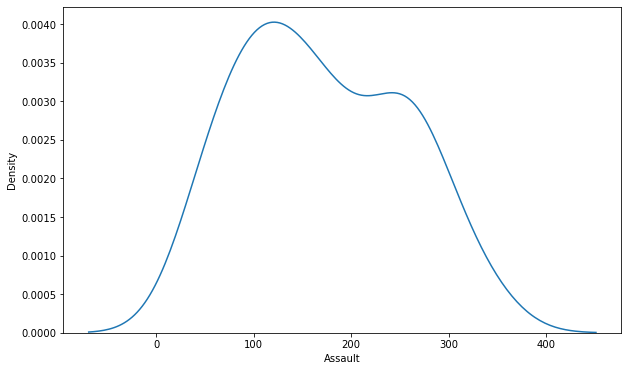

UrbanPop


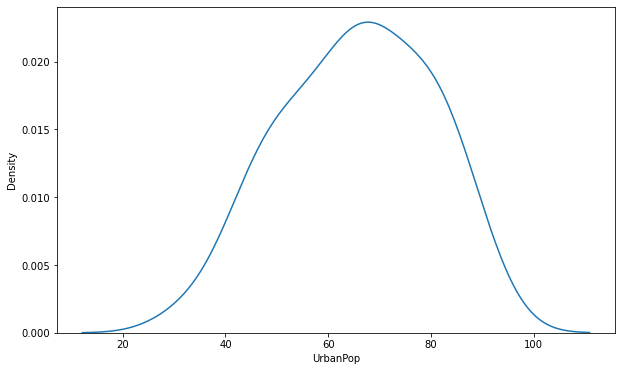

Rape


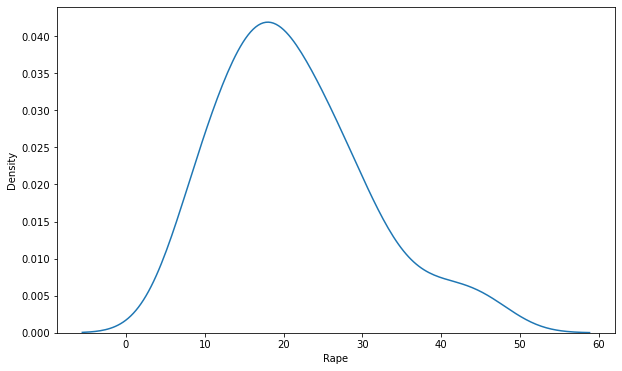

In [12]:
# checking with kernal density plot
for n in crime.columns:
    plt.figure(figsize=(10,6))
    print(n)
    sns.kdeplot(data[n])
    plt.show()

Murder         AxesSubplot(0.125,0.125;0.168478x0.755)
Assault     AxesSubplot(0.327174,0.125;0.168478x0.755)
UrbanPop    AxesSubplot(0.529348,0.125;0.168478x0.755)
Rape        AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

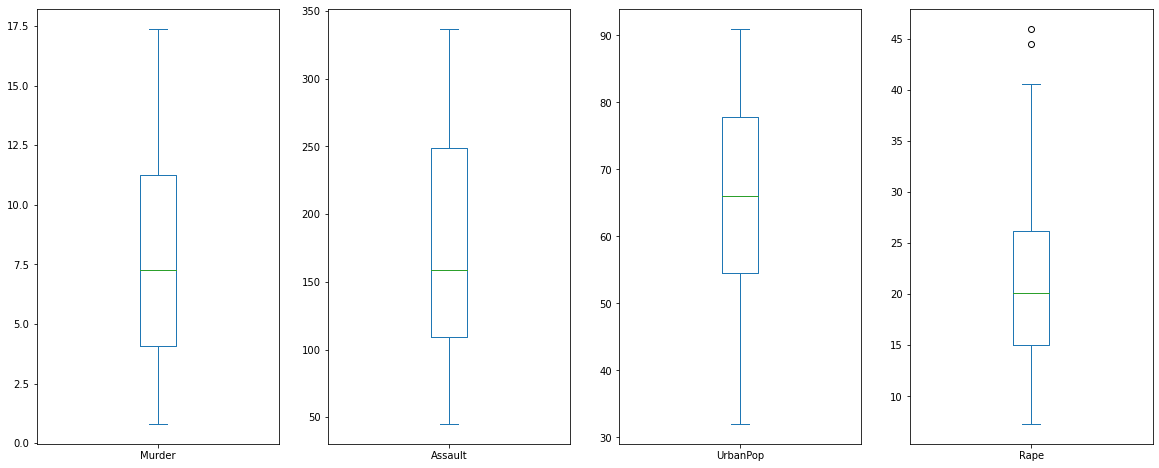

In [13]:
# checking for outliars with boxplot for each variable

crime.iloc[:,[0,1,2,3]].plot(kind='box',figsize=(20,8),fontsize=10,subplots=True,sharex=False)

in crime- rape having some outliars rest are having normally distributed

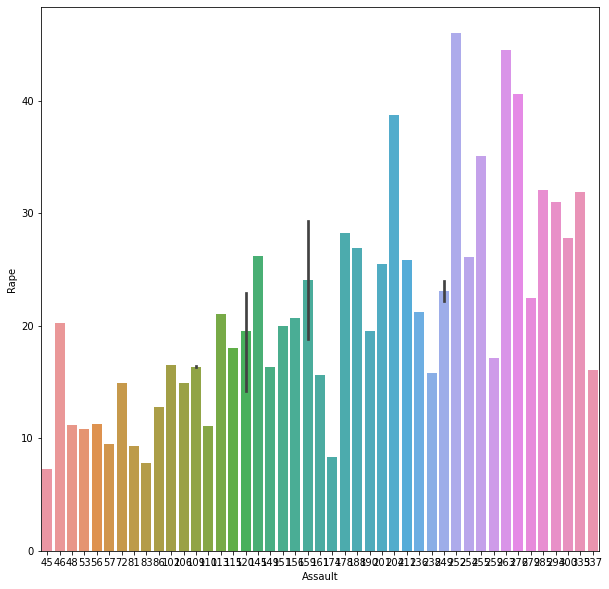

In [14]:
plt.figure(figsize = (10,10))
ax = sns.barplot(x='Assault', y='Rape', data= crime)
plt.show()

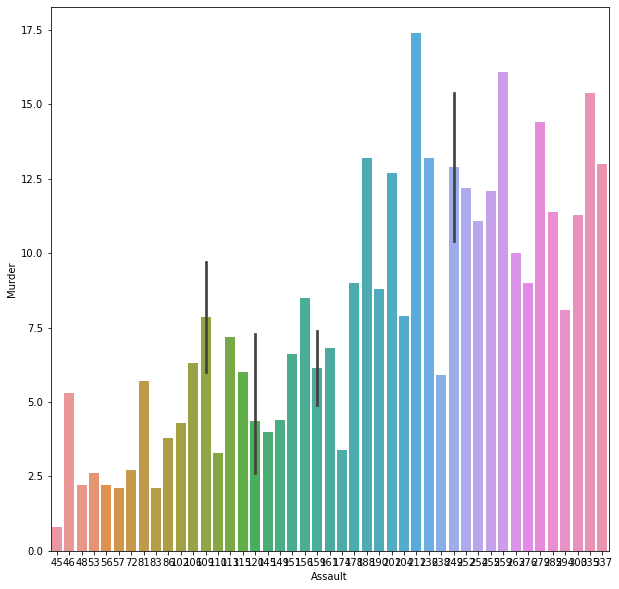

In [15]:
plt.figure(figsize = (10,10))
ax = sns.barplot(x='Assault', y='Murder', data= crime)

plt.show()

# normalizing the data 

In [16]:
def norm_func (i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)


In [17]:
df_norm=norm_func(crime)

In [18]:
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


# hierarchical clustering

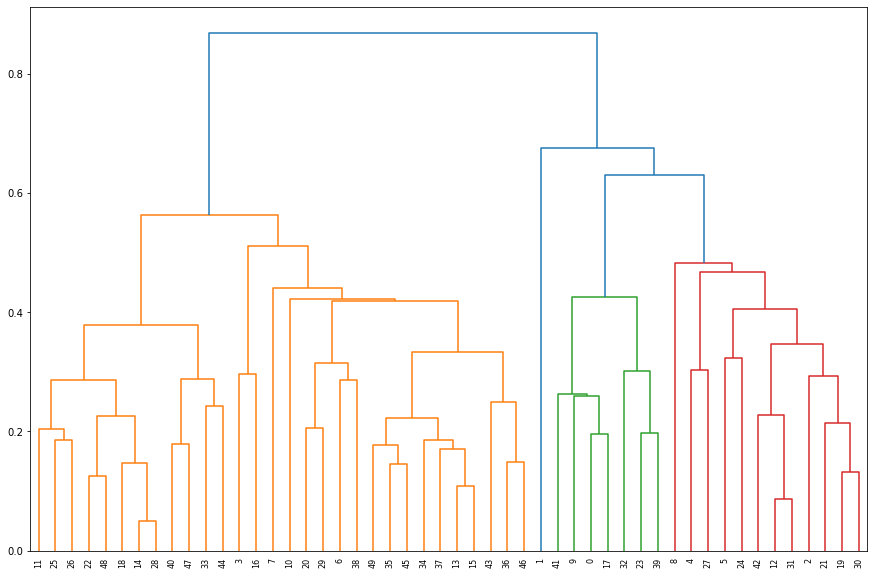

In [19]:
plt.figure(figsize=(15,10))
# by average method
dendogram=sch.dendrogram(sch.linkage(df_norm,method='average'))

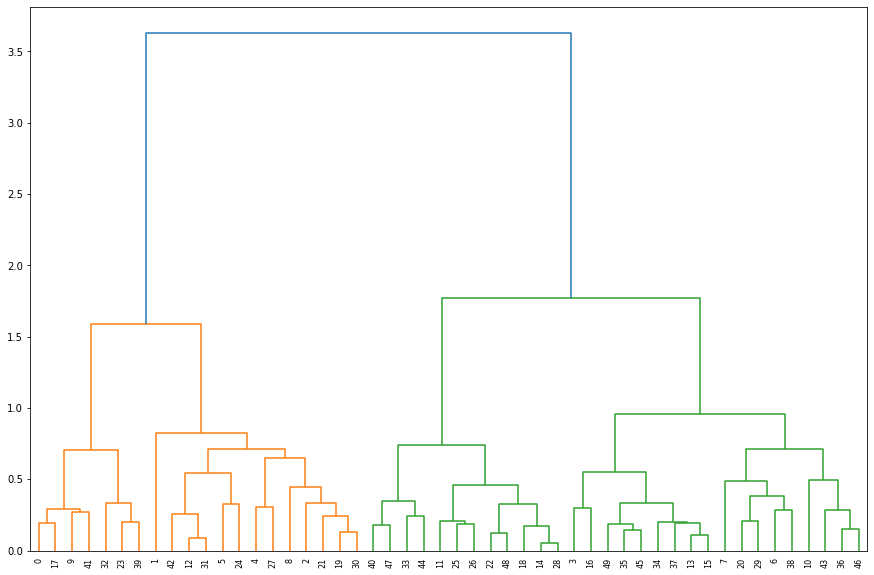

In [20]:
plt.figure(figsize=(15,10))
# by ward method 
dendogram=sch.dendrogram(sch.linkage(df_norm,method='ward'))

one of the most commaon drawback of heirarichal clustering is it dimensionaly cursed,it cannot handle large data, dendograms required lots of space to cluster the dataset.here we have only 50 rows theerfore we get clusters in proper way  

from above heirarchi cluster diagram we assume , best no. of cluster by looking most lenghthy vertical line without cuts by any horizantal line is showing 2 (n=2)

but we dont know the exact value of no. of clusters , so we check for best no. of cluster, linkage method and there silhouette score. choose the cluster no.and linkage who has maximum silhouette score

In [21]:
from sklearn.metrics import silhouette_score
# always start number from 2 as there no any cluster with 1 
n_clusters = [2,3,4,5,6,7,8]  

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) 
        hie_labels1 = hie_cluster1.fit_predict(df_norm)
        silhouette_score1 = silhouette_score(df_norm, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- average : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- single : 0.21033337025958487

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.3191691542812128
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.30877213909512063
For n_clusters = 3 The average silhouette_score with linkage- average : 0.35149572430421583
For n_clusters = 3 The average silhouette_score with linkage- single : 0.14223288708185444

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3298707379986785
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.30607294424263076
For n_clusters = 4 The average silhouette_score with linkage- average : 0.36992391140277

# here we can clearly say that , with n_cluster = 2 has maximum no. of silhouette score with 42 %

In [22]:
# model with ward method - ward minimizes the variance of the clusters being merged.
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')

In [23]:
hc.fit(df_norm)

AgglomerativeClustering()

In [24]:
y_hc=hc.fit_predict(df_norm)
y_hc

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [25]:
crime['cluster']= y_hc
crime.head()

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1


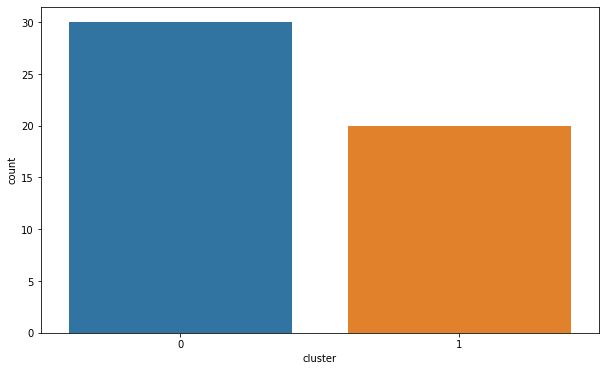

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(x='cluster',data=crime)
plt.show()

In [27]:
crime.groupby('cluster').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
cluster,,,,
0,4.870,114.433333,63.633333,15.943333
1,12.165,255.250000,68.400000,29.165000


# from above table we can easily segregate the new independnat input entry into a target class easily , from table urban population above 65 - 70 having more crime rates. states within 0 cluster having less crime rate and within 1 cluster having more crime rate

# K MEAN CLUSTERING

In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [29]:
c=pd.read_csv(r"C:\Users\ABC\Downloads\crime_data.csv")

In [30]:
c.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [31]:
c.drop(["Unnamed: 0"],inplace=True,axis=1)

In [32]:
c.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [33]:
scaler=StandardScaler()
c_scaled=scaler.fit_transform(c)

In [34]:
c_scaled

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

# initially we can not assume or select no. of cluster for k mean clustering so we check for wcss(within cluster sum squared )and silhoette score 

In [35]:
wcss=[]

kmeans=KMeans(n_clusters=6, random_state=42)
kmeans.fit(c_scaled)

wcss.append(kmeans.inertia_)

In [36]:
wcss

[44.259807638112314]

In [37]:
wcss=[]
for i in range (1,20):
    kmeans=KMeans(n_clusters=i, random_state=42)
    kmeans.fit(c_scaled)

    wcss.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [38]:
wcss

[200.0,
 104.96163315756871,
 80.08569526137276,
 57.55425863091104,
 50.33327385184907,
 44.259807638112314,
 40.91266722247345,
 35.695877063333725,
 32.57509993011513,
 29.253498916734607,
 25.819174220864078,
 22.668583553359433,
 20.7248429866758,
 19.073211149797594,
 17.99895105676744,
 16.983322517519685,
 15.487742096184615,
 14.149000423644182,
 14.181064439328162]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


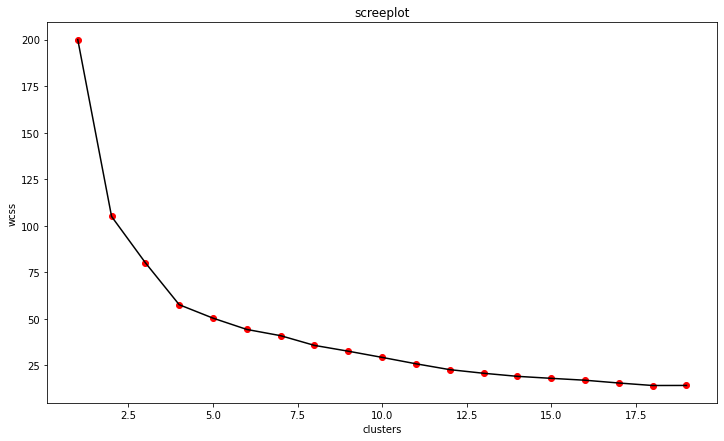

In [39]:
# potting elbow plot for wcss vs n_cluster to find no. of cluster  by visual method.
wcss=[]
for i in range (1,20):
    kmeans=KMeans(n_clusters=i, random_state=42)
    kmeans.fit(c_scaled)

    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,7))   

plt.plot(range(1,20),wcss,color = 'black')
plt.scatter(range(1,20),wcss,color='red')

plt.title('screeplot')
plt.xlabel('clusters')
plt.ylabel ('wcss')
plt.show()

where the wcss change drastically and then not deeps too much , which is the best no. of cluster 
near n = 4 / 5 wcss not decrease further so we can choose this no, as n_cluster

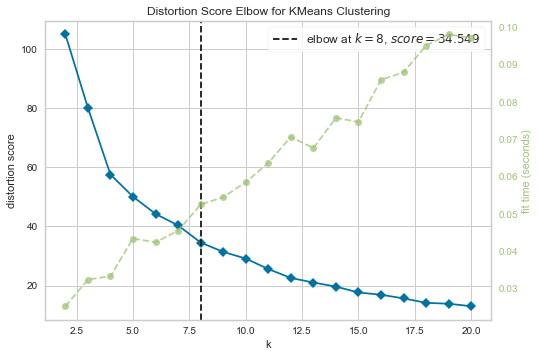

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
from yellowbrick.cluster import KElbowVisualizer

elbow=KElbowVisualizer(KMeans(),k=20)
elbow.fit(c_scaled)
elbow.show()

checking by silhouette score method

In [41]:
# With the elbow method, the ideal number of clusters to use was 9.
# We will also use the Silhouette score to determine an optimal number.

clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for stadardScaler applied on data.

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(c_scaled)
    sil_score1= silhouette_score(c_scaled, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.4084890326217641
For n_clusters = 3 The average silhouette_score is : 0.3095091512791688
For n_clusters = 4 The average silhouette_score is : 0.33968891433344395
For n_clusters = 5 The average silhouette_score is : 0.30612803169146263
For n_clusters = 6 The average silhouette_score is : 0.29910456843899946
For n_clusters = 7 The average silhouette_score is : 0.23035904501364116
For n_clusters = 8 The average silhouette_score is : 0.2732934287338534
For n_clusters = 9 The average silhouette_score is : 0.2518939934580804


# from above no. of cluster = 2 having maximum  silhouette score which is 0.4 , so we choose no. of clusster = 2 by silhouette score method 


In [42]:
from sklearn.cluster import KMeans
act_cluster=KMeans(n_clusters=2,random_state=42)
act_cluster.fit(c_scaled)

KMeans(n_clusters=2, random_state=42)

In [43]:
act_cluster.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [44]:
c["cluster"]=act_cluster.labels_

In [45]:
c.head()

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1


In [46]:
from sklearn.metrics import silhouette_score

silhouette_score(c_scaled,act_cluster.labels_)

0.4084890326217641

In [47]:
c.cluster.value_counts()

0    30
1    20
Name: cluster, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

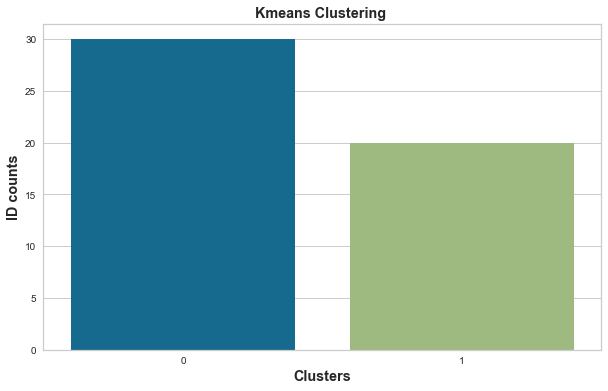

In [48]:
# count plot for crime rate
plt.figure(figsize=(10,6))
sns.countplot(x='cluster', data = c)
plt.title('Kmeans Clustering ',fontsize='large',fontweight='bold')
plt.xlabel('Clusters', fontsize='large', fontweight='bold')
plt.ylabel('ID counts', fontsize='large', fontweight='bold')
plt.show

In [49]:
table=c.groupby('cluster').agg(['mean'])
table

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
cluster,,,,
0,4.870,114.433333,63.633333,15.943333
1,12.165,255.250000,68.400000,29.165000


# we get almost same table like hierarchical clustering 
# from above table we can easily segregate the new independnat input entry into a target class easily , from table urban population above 65 - 70 having more crime rates. states are in cluster 0 having low crime rate and in cluster 1 having more crime rate.

# DBSCAN

In [50]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [51]:
crime_data=pd.read_csv(r"C:\Users\ABC\Downloads\crime_data.csv")

In [52]:
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [53]:
crime_data.drop(["Unnamed: 0"],inplace=True,axis=1)

In [54]:
crime_data.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [55]:
scaler=StandardScaler()
crime_data_scaled=scaler.fit_transform(crime_data)

In [56]:
crime_data_scaled

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [57]:
dbscan=DBSCAN(eps=2,min_samples=4)
dbscan.fit(crime_data_scaled)

DBSCAN(eps=2, min_samples=4)

In [58]:
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [59]:
s_score = silhouette_score(crime_data_scaled,dbscan.labels_)

print("silhouette_score",s_score )

silhouette_score 0.234555987531598


here we get only one data point which is outliar (-1) rest are data points .

In [60]:
final=pd.read_csv(r"C:\Users\ABC\Downloads\crime_data.csv")

final['cluster']= act_cluster.labels_

final.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [61]:
final_sort=final.sort_values("cluster")

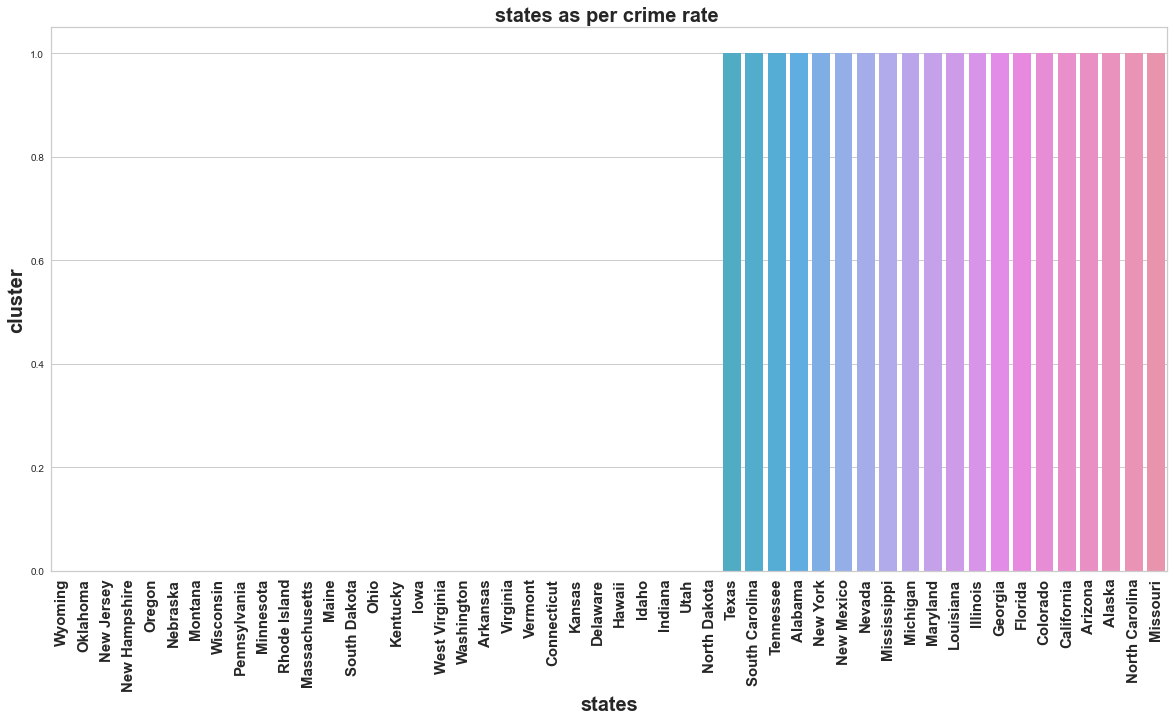

In [62]:
plt.figure(figsize = (20,10))
sns.barplot(x='Unnamed: 0', y='cluster', data= final_sort)
plt.title('states as per crime rate ',fontsize=20,fontweight='bold')
plt.xlabel('states', fontsize=20, fontweight='bold')
plt.ylabel('cluster', fontsize=20, fontweight='bold')
plt.xticks(rotation=90,fontweight='bold',fontsize=15)
plt.show()


# CONCLUSION

Firstly we check the outliars with the help oh histogram and kernal density plot. Then we check for correlation between differant variables. Then we scale the data for avoid noise from the data. Then i used & analyzed two clustering techniques here..i) KMeans, ii) Hierarchical Clusterig & iii) DBSCAN.

From Hierarchical Clusterig we get max silhouette score with 42 % by no.cluster = 2 by using method = ward.

From KMeans Clusterig we get no.cluster =9 , by using ELBOW method also we check with significant method (silhouette score ) we get s_score 33% with no.cluster =2

From dbscan we check for outliars in which we have 1 datapoint is showing outliars and rest data points are core data points.